In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from scipy import stats
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

1. Understanding and Preprocessing the Data

- Exploratory Data Analysis (EDA): First, we'll explore the dataset to understand its structure, identify missing values, and observe the distribution of various features. Tools like pandas, matplotlib, and seaborn will be invaluable here.
- Data Cleaning: Based on the EDA, we'll handle missing values, possibly using imputation techniques, and remove or correct any anomalies or outliers.
- Feature Engineering: We might need to create new features or modify existing ones to improve the model's performance. This could include encoding categorical variables, normalizing numerical features, and possibly handling imbalanced data.

2. Model Selection and Training

- Choosing a Model: Given this is a binary classification problem, we can start with simple models like Logistic Regression and move to more complex ones like Random Forests, Gradient Boosting Machines (e.g., XGBoost), or even neural networks if necessary.
Cross-Validation: Use cross-validation techniques to evaluate model performance robustly.
Hyperparameter Tuning: Optimize the model parameters using techniques like Grid Search or Random Search.

3. Evaluation and Improvement

- Metrics: Focus on metrics suitable for binary classification, such as accuracy, precision, recall, F1-score, and the ROC-AUC score.
- Model Improvement: Based on initial results, we may iterate on the preprocessing, feature engineering, or model selection steps to improve performance.

4. Deployment in a Web App

- Choosing a Framework: For deploying the model, we can use frameworks like Flask or Django for Python-based web apps. Another option is to use Streamlit, which is particularly user-friendly for data science projects.
- Model Serialization: Serialize the trained model using libraries like joblib or pickle so it can be loaded into your web application.
- Building the Web App: Develop the application's UI to accept user input for the different features and display the model's stroke prediction.
- Hosting: Consider platforms like Heroku, AWS, or Google Cloud Platform for deploying your web app.

### Exploratory Data Analysis

First, let's import the dataset and set it as a pandas dataframe

In [2]:
raw_df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory data analysis

The first step is researching and learning about the structure of the date. Firs we will list the columns in our dataset.

In [3]:
raw_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Now we get general insights about the data with the describe method

In [4]:
raw_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


We found something relevant in the bmi feature. We see that the standard deviation is 7.85, what tell us that date is really close to the mean. However we find that th maximum valu is 97.6 and the 75% quartal is just 33.1, so we have presennce os important outliers here. Something similar is happening in the average glucose level column, but here we have a higher standar deviation.

Now we find null values in our dataset

In [5]:
raw_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We see that the only column with null values is the bmi column with 201 values that represent 3.93% of the data

In [6]:
raw_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
string_col = raw_df.select_dtypes(include="object").columns
raw_df[string_col]=raw_df[string_col].astype("string")

In [8]:
raw_df.dtypes

id                            int64
gender               string[python]
age                         float64
hypertension                  int64
heart_disease                 int64
ever_married         string[python]
work_type            string[python]
Residence_type       string[python]
avg_glucose_level           float64
bmi                         float64
smoking_status       string[python]
stroke                        int64
dtype: object

Now we visualize the distribution of the features, starting with the distributionf of the dependent variable.

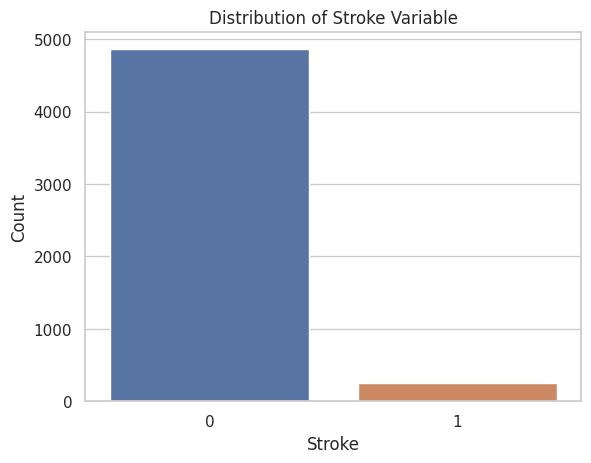

In [9]:
plt.figure()
sns.countplot(x='stroke', data=raw_df)
plt.title('Distribution of Stroke Variable')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [10]:
raw_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

The count plot of the 'stroke' variable shows a significant class imbalance, with far fewer stroke cases than non-stroke cases. This imbalance is crucial to consider because it can affect model performance and the choice of evaluation metrics.

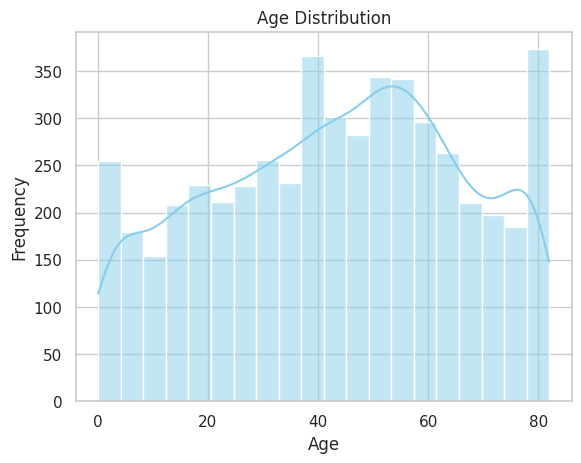

In [11]:
plt.figure()
sns.histplot(data=raw_df, x='age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distributions shows that most of the individuals are in the range of 40 an 60 years old. The chart let us infere that all the ages presen an acceptable representation in the dataset, which is good to work, consider that age might be an important feature in the prediction.

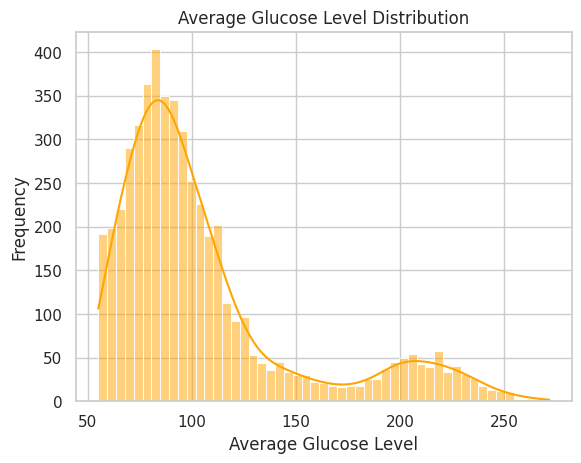

In [12]:
sns.histplot(data=raw_df, x='avg_glucose_level', kde=True, color='orange')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

The distribution of average glucose levels is right-skewed with a long tail, indicating that while most individuals have glucose levels in a moderate range, there's a subset with significantly higher values. High glucose levels are a risk factor for stroke, so this variable could be particularly predictive for the positive class.

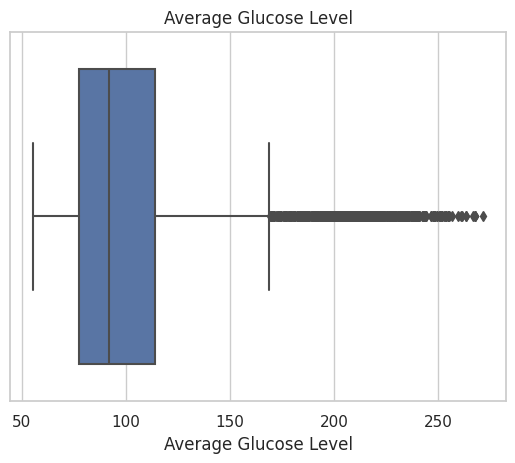

In [13]:
sns.boxplot(x='avg_glucose_level', data=raw_df)
plt.title('Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.show()

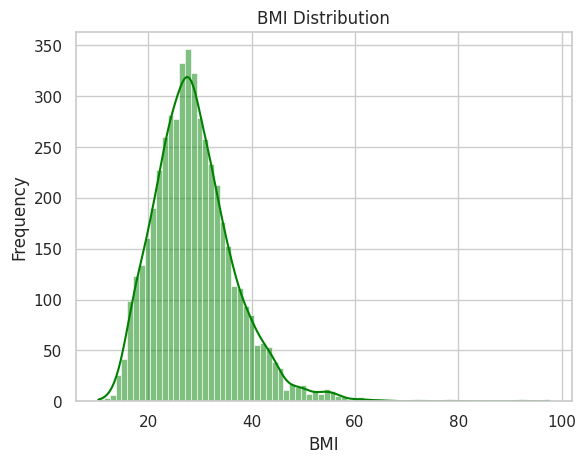

In [14]:
sns.histplot(data=raw_df, x='bmi', kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The distribution of BMI have a normal distribution feeeling what indicates that most of the individuals have BMI in a normal range. However, there are individuals with high BMI giving the right skew we see in the plot what can represent outliers or extreme values.

A box plot, can help us to identify the outliers in this column.

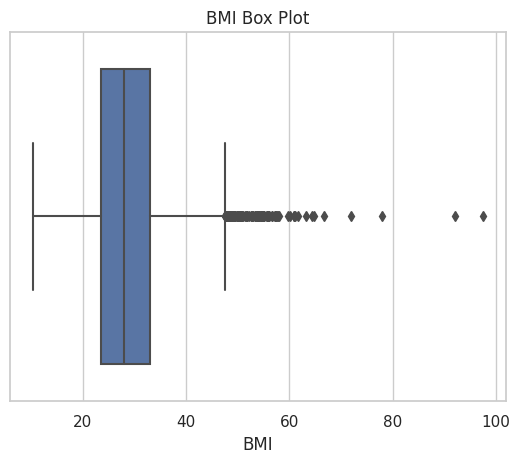

In [15]:
sns.boxplot(x='bmi', data=raw_df)
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.show()

As we see, there are outliers in the higher range of the BMI measure and we will need to deal with them before training the model.

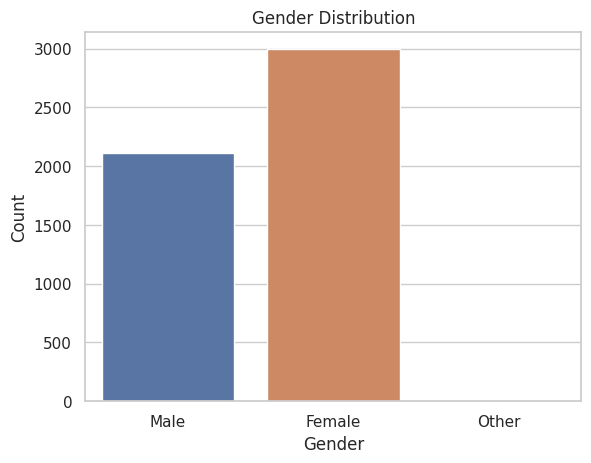

In [16]:
sns.countplot(x='gender', data=raw_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The gender distribution shows that there are more female participants than male in the dataset

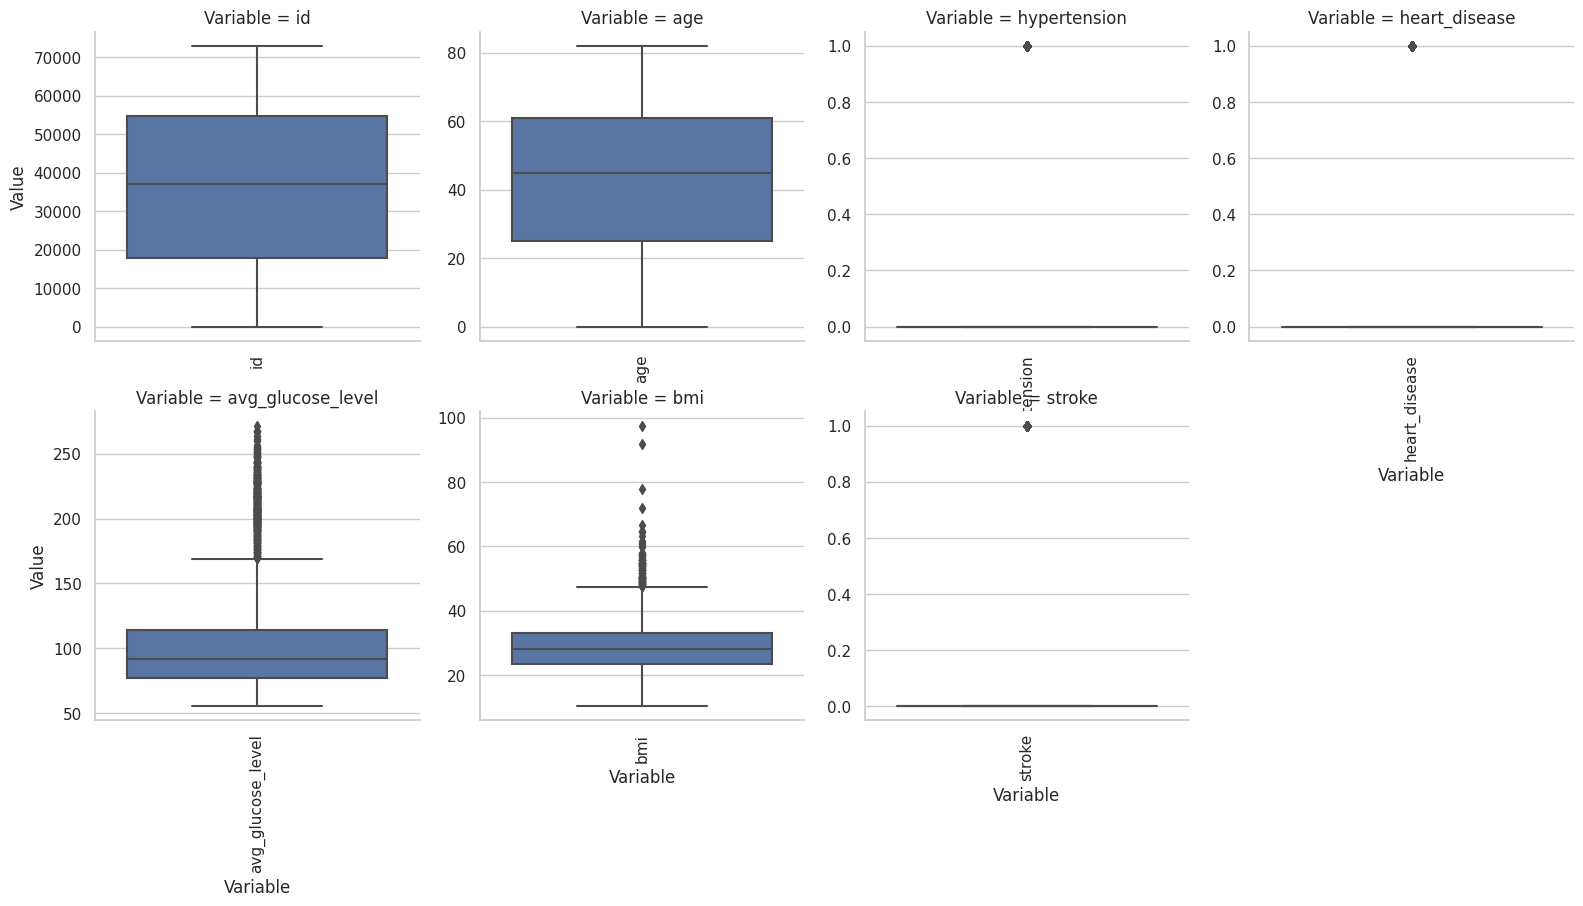

In [20]:
numeric_cols = raw_df.select_dtypes(include=['float64', 'int64']).columns
melted_df = pd.melt(raw_df[numeric_cols], var_name='Variable', value_name='Value')

g = sns.catplot(x='Variable', y='Value', col='Variable',
                data=melted_df, kind='box',
                col_wrap=4, # Adjust based on the number of plots per row
                sharex=False, sharey=False,
                height=4, aspect=1)

g.set_xticklabels(rotation=90)
plt.show()

We can see a bidirectional relationship between features with a seaborn pairplot, however, is hard to notice the positive stroke cases due to the low number of samples in the data.

[]

<Figure size 1500x1000 with 0 Axes>

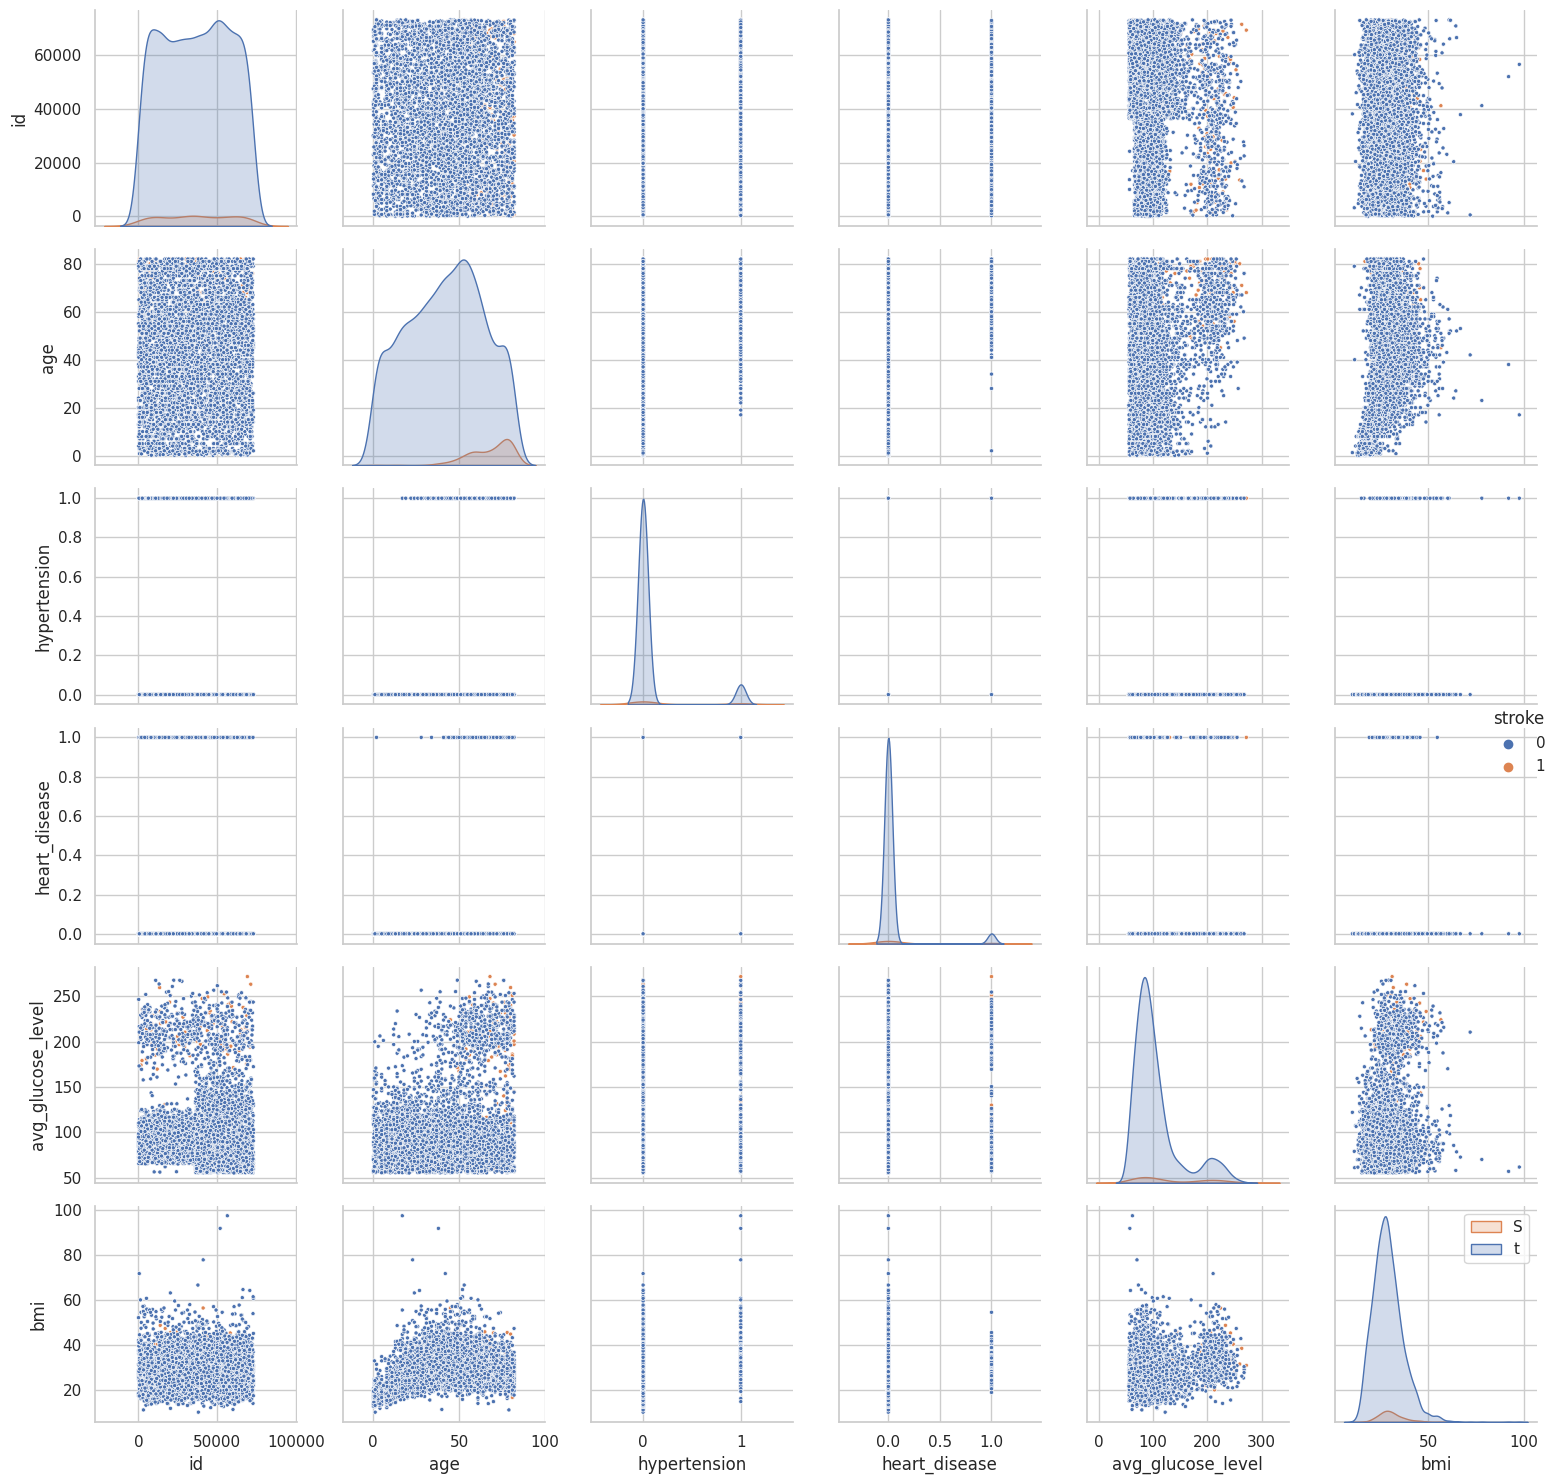

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(raw_df,hue="stroke", markers = '.')
plt.legend("Stroke")
plt.tight_layout()
plt.plot()

Finally, for this section of EDA we summarize the distributions of variables, showing some features we haven't cover. Just to get the full picture. 

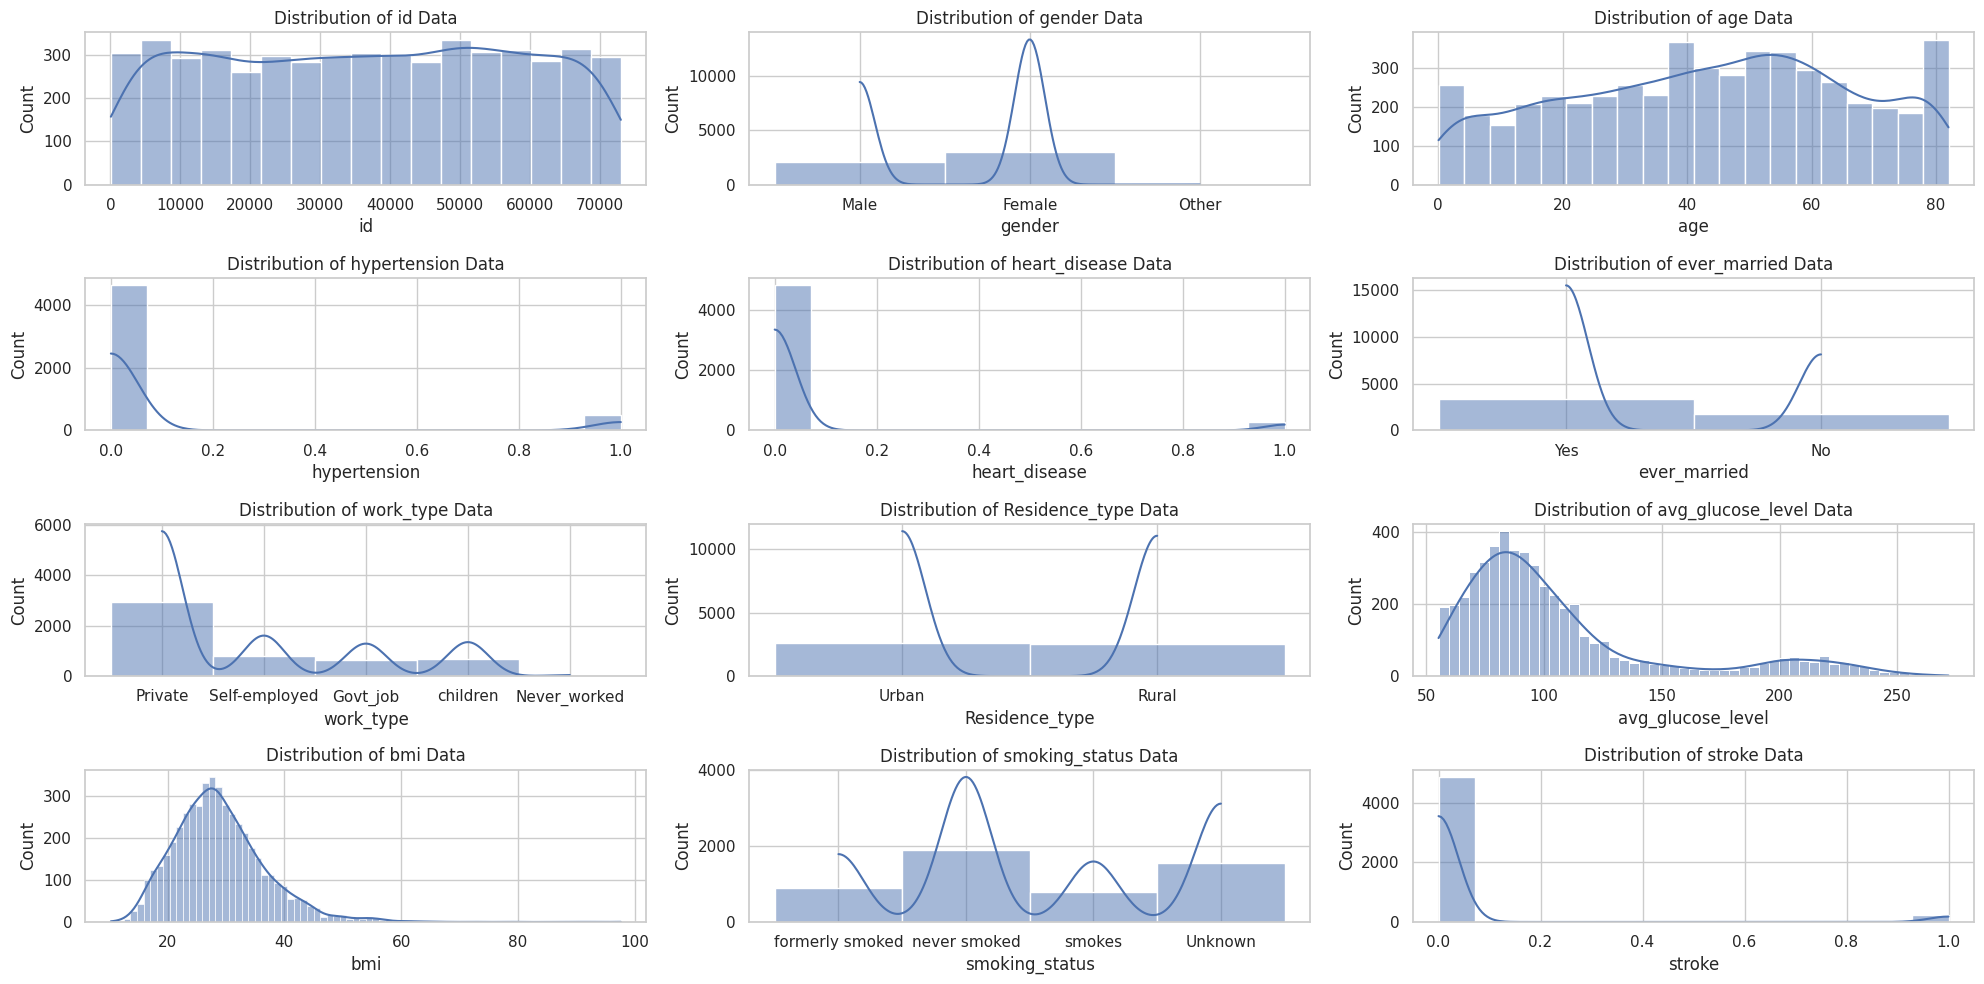

In [22]:
plt.figure(figsize=(20,10))
for i,col in enumerate(raw_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(raw_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

What we find is that important features such as hypertension or heart disease, present the same imbalance as our dependet variable. This is an initial clue of the importance of these features in order to predict the stroke.

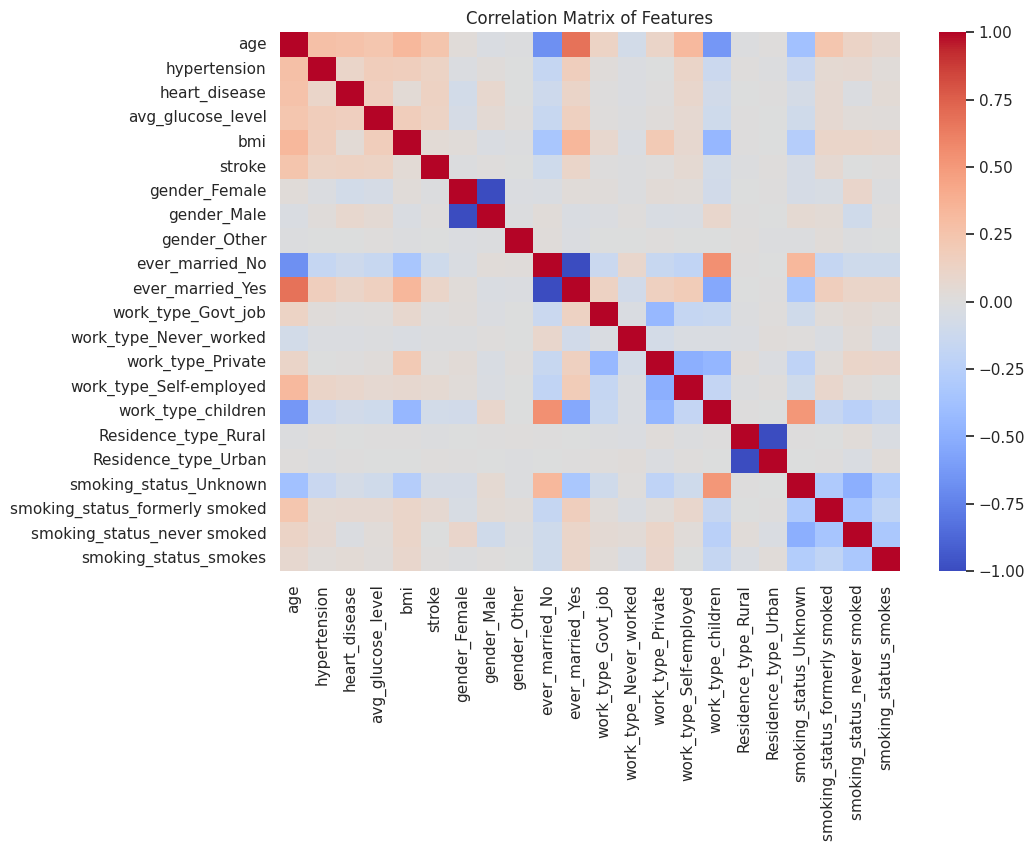

In [23]:
# Convert categorical variables to dummy variables for correlation analysis
df_for_corr = pd.get_dummies(raw_df.drop('id', axis=1))

# Calculate the correlation matrix
corr_matrix = df_for_corr.corr()

# Generate a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Data preprocessing

First we are addreseing the null values. Due to the class imbalance presented in the dataset we want to keep all the records that present positive stroke. Frist, we are counting how many stroke positive records are with null values in any of the features.

In [24]:
raw_df[(raw_df['stroke'] == 1) & raw_df.isna().any(axis = 1)].count()

id                   40
gender               40
age                  40
hypertension         40
heart_disease        40
ever_married         40
work_type            40
Residence_type       40
avg_glucose_level    40
bmi                   0
smoking_status       40
stroke               40
dtype: int64

In [25]:
df = raw_df.drop(raw_df[(raw_df['stroke'] == 1) & raw_df.isna().any(axis = 1)].index)

df['stroke'].count()


5070

We removed 40 out of the 5110 initial records. Now, giving that the missing records are presented only in the BMI feature and the distribution we already saw has a 'normal distribution' apporach, we are replacing the null values with the average.

In [26]:
bmi_mean = df['bmi'].mean()

df['bmi'] = df['bmi'].fillna(bmi_mean)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64